# Getting Started with Python (Part 2) 
## The goal of this exercise is to use financial variables to predict the short-term exchange rate. 
## A. Data Preparation through Exploratory Data Analysis (EDA)

## Dataset Details

### 0. Constructed Indices (All Equally Weighted)

1. **Emerging Market Currency Index**  
2. **Emerging Market Equity Index**  
3. **Emerging Market Spread Index**  

#### Coverage
Each index is built from data on 21 emerging markets:  
*Russia, Turkey, South Africa, Israel, Poland, Hungary, Czech Republic, Romania, Brazil, Chile, Colombia, Mexico, Indonesia, India, Korea, Malaysia, Singapore, the Philippines, Thailand, Taiwan, and China.*

#### Definitions
- **Emerging Market Equity Index**  
  Weighted basket of local major equity indices from each of the 21 emerging markets.  
- **Emerging Market Spread Index**  
  Spread between each country’s 10-year government bond yield and the U.S. 10-year Treasury yield, highlighting credit and sovereign risk relative to the United States.

---

#### 0.1. Additional Variables

All of the following are tracked as **5 trading day returns** (i.e., percentage changes over rolling 5-trading-day periods):

1. **MSCI Emerging Markets Equity Index (USD)**  
   - A benchmark capturing large- and mid-cap equities across emerging economies in USD terms.  

2. **S&P 500**  
   - A key U.S. equity market benchmark comprising 500 large-cap stocks.  

3. **DAX (Germany)**  
   - Represents 40 major German companies, gauging Europe’s largest economy.  

4. **MSCI Europe Financials Index**  
   - Focuses on European financial-sector companies, including banks, insurance, and real estate.  

5. **J.P. Morgan Emerging Markets Bond Index**  
   - Tracks U.S. dollar–denominated government bonds from emerging markets.  

6. **IBoxx US High Yield Corporate Bond Index**  
   - Measures below-investment-grade (“junk”) U.S. corporate bonds, typically higher yield but higher risk.  

7. **IBoxx US Investment Grade Corporate Bond Index**  
   - Captures higher-rated (investment-grade) corporate debt in the U.S.  

8. **Crude Oil (WTI)**  
   - A benchmark for U.S. crude oil prices, heavily influenced by global supply/demand and geopolitics.  

9. **Gold**  
   - Viewed as a “safe-haven” asset, priced in U.S. dollars and affected by broad market sentiment.  

10. **London Metal Exchange (LME) Index**  
    - Aggregates prices of key industrial metals (e.g., aluminum, copper, nickel, zinc).  

11. **U.S. Dollar Index**  
    - Gauges the U.S. dollar’s value against a basket of major currencies.

---

#### 0.2. Frequency of Returns

All variables, including both the **three emerging market indices** and the **additional global benchmarks**, reflect **5 trading day returns**. This unified time frame allows for straightforward comparison of performance across different asset classes and risk factors. 


### 1. Download Data:
Download the 'Dataset_weekly.csv' file and save it in the same directory as your notebook.
### 2. Load Data:
Use Pandas to load the data file. Utilize the `read_csv()` method to load 'Dataset_weekly.csv' as a Pandas DataFrame.




In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Dataset_weekly.csv')

### 3. Quick Data Check:
Examine the top five rows of the DataFrame using the `head()` method.

In [2]:
df.head()

,Date,Emerging Markets Equal Weighted Currency Index,Emerging Markets Equal Weighted Index Equity Index (Local Currency),MSCI Emerging Markets Equity Index (USD),S&P 500,Dax,MSCI Europe Financials Index,J.P. Morgan Emerging Markets Bond Index,IBoxx US Investment Grade Corporate Bond Index,IBoxx US High Yield Corporate Bond Index,Emerging Markets -US 10 Year Bond Average Spread,US 10 Year Treasury Yield,Crude Oil WTI,Gold,London Metal Exchange Index,US Dollar Index
0,1/31/2012,0.004764,0.014407,0.020039,-0.010268,0.005683,-0.002900,0.011429,0.016293,0.005693,0.034960,-0.103442,-0.009198,0.022312,-0.006118,-0.003722
1,2/6/2012,0.010817,0.022674,0.027515,0.024346,0.047338,0.059235,0.008121,0.002494,0.006715,-0.033936,0.059029,-0.015857,-0.008590,0.013485,-0.002810
2,2/10/2012,-0.002632,-0.002875,-0.004828,-0.001229,-0.010662,-0.005518,-0.000400,-0.000201,-0.001109,-0.021010,0.043649,0.018105,0.000302,-0.002651,0.000556
3,2/16/2012,-0.001713,0.006353,0.007154,0.011467,0.008804,0.000274,0.004200,0.000190,-0.000204,0.001379,0.000043,0.036840,0.002075,-0.030754,0.003062
4,2/23/2012,0.008012,0.007381,0.009854,0.003990,0.008542,0.013573,0.009227,0.000995,0.009734,0.004709,0.006109,0.054042,0.033614,0.022572,-0.006699


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.set_index('Date', inplace=True)
df.head()

,Emerging Markets Equal Weighted Currency Index,Emerging Markets Equal Weighted Index Equity Index (Local Currency),MSCI Emerging Markets Equity Index (USD),S&P 500,Dax,MSCI Europe Financials Index,J.P. Morgan Emerging Markets Bond Index,IBoxx US Investment Grade Corporate Bond Index,IBoxx US High Yield Corporate Bond Index,Emerging Markets -US 10 Year Bond Average Spread,US 10 Year Treasury Yield,Crude Oil WTI,Gold,London Metal Exchange Index,US Dollar Index
Date,,,,,,,,,,,,,,,
2012-01-31,0.004764,0.014407,0.020039,-0.010268,0.005683,-0.002900,0.011429,0.016293,0.005693,0.034960,-0.103442,-0.009198,0.022312,-0.006118,-0.003722
2012-02-06,0.010817,0.022674,0.027515,0.024346,0.047338,0.059235,0.008121,0.002494,0.006715,-0.033936,0.059029,-0.015857,-0.008590,0.013485,-0.002810
2012-02-10,-0.002632,-0.002875,-0.004828,-0.001229,-0.010662,-0.005518,-0.000400,-0.000201,-0.001109,-0.021010,0.043649,0.018105,0.000302,-0.002651,0.000556
2012-02-16,-0.001713,0.006353,0.007154,0.011467,0.008804,0.000274,0.004200,0.000190,-0.000204,0.001379,0.000043,0.036840,0.002075,-0.030754,0.003062
2012-02-23,0.008012,0.007381,0.009854,0.003990,0.008542,0.013573,0.009227,0.000995,0.009734,0.004709,0.006109,0.054042,0.033614,0.022572,-0.006699


### 4. Data Description:
Use the DataFrame’s `info()` method to get a quick overview of the data, including the total number of rows, attribute types, and the number of non-null values for each attribute.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528 entries, 2012-01-31 to 2020-06-17
Data columns (total 15 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Emerging Markets Equal Weighted Currency Index                       528 non-null    float64
 1   Emerging Markets Equal Weighted Index Equity Index (Local Currency)  528 non-null    float64
 2   MSCI Emerging Markets Equity Index (USD)                             528 non-null    float64
 3   S&P 500                                                              528 non-null    float64
 4   Dax                                                                  528 non-null    float64
 5   MSCI Europe Financials Index                                         528 non-null    float64
 6   J.P. Morgan Emerging Markets Bond Index                              528 non-null    fl

### 5. Data Dimensions:
Determine the dimensions (number of rows and columns) of the DataFrame using the `shape` method.

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print(f'No. of Rows: {no_of_rows}')
print(f'No. of Columns: {no_of_columns}')


Dimension of the data:  (528, 15)
No. of Rows: 528
No. of Columns: 15


### 6. Data Visualization:
To visualize the data, you can plot a histogram for each numerical attribute using the `hist()` method. This method relies on Matplotlib, which needs a graphical backend to display the plots.

Note that calling `show()` is optional in a Jupyter notebook because plots are automatically displayed when a cell is executed.

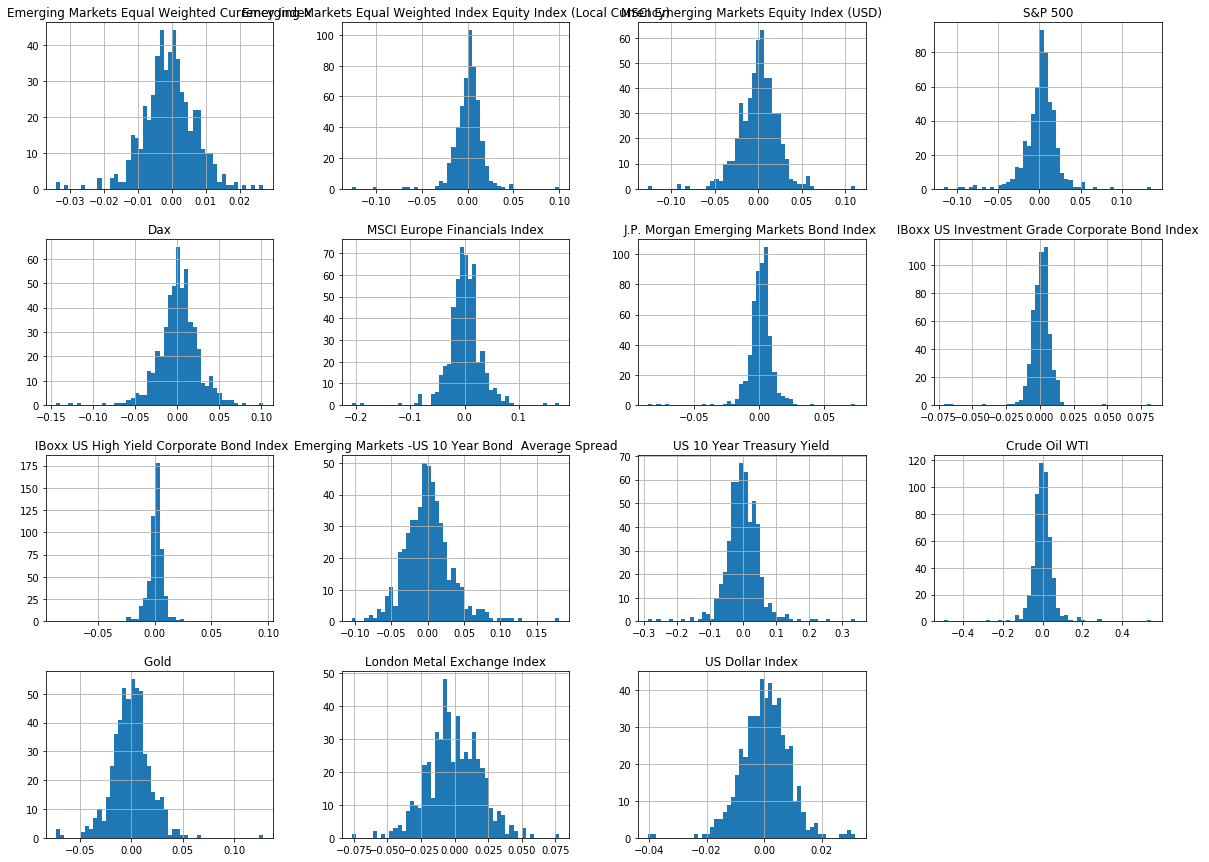

In [7]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt


df.hist(bins=50, figsize=(20,15))
plt.show()

# # box and whisker plots 
# df.plot(kind = 'box', subplots = True, layout = (5,3) , sharex = False, sharey = False,figsize = (20,15) )
# plt.show()

In [8]:
# Define a custom function for compounding:
def compound_returns(weekly_returns):
    """
    Takes a Series of weekly simple returns and compounds them 
    to get the total return over the entire period.
    """
    # Example: For weekly returns like 0.02, 0.01, -0.005
    # total return = (1 + 0.02)*(1 + 0.01)*(1 - 0.005) - 1
    return (weekly_returns + 1).prod() - 1

In [9]:
df_M = df.resample('M').apply(compound_returns)
df_M

,Emerging Markets Equal Weighted Currency Index,Emerging Markets Equal Weighted Index Equity Index (Local Currency),MSCI Emerging Markets Equity Index (USD),S&P 500,Dax,MSCI Europe Financials Index,J.P. Morgan Emerging Markets Bond Index,IBoxx US Investment Grade Corporate Bond Index,IBoxx US High Yield Corporate Bond Index,Emerging Markets -US 10 Year Bond Average Spread,US 10 Year Treasury Yield,Crude Oil WTI,Gold,London Metal Exchange Index,US Dollar Index
Date,,,,,,,,,,,,,,,
2012-01-31,0.004764,0.014407,0.020039,-0.010268,0.005683,-0.002900,0.011429,0.016293,0.005693,0.034960,-0.103442,-0.009198,0.022312,-0.006118,-0.003722
2012-02-29,0.017724,0.040569,0.059967,0.040800,0.061457,0.076997,0.026503,0.014360,0.022405,-0.034815,0.099806,0.087370,-0.015864,0.010971,-0.006944
2012-03-31,-0.011499,0.000398,-0.031301,0.029252,0.021049,0.002666,0.002852,-0.010417,-0.005541,-0.026774,0.114752,-0.015494,-0.030309,-0.039337,0.004893
2012-04-30,-0.003487,-0.009683,-0.024459,-0.004004,-0.036926,-0.084272,0.012042,0.007783,0.004981,0.029531,-0.115321,-0.008243,0.000967,-0.001403,-0.002447
2012-05-31,-0.058836,-0.062155,-0.102805,-0.064020,-0.070630,-0.156408,-0.022635,0.006785,-0.015079,0.107374,-0.197256,-0.172415,-0.058248,-0.095731,0.052279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,-0.022816,-0.075346,-0.061745,-0.100215,-0.096419,-0.105035,-0.009145,0.014827,-0.016680,0.193183,-0.268968,-0.141435,-0.014539,-0.010943,0.002508
2020-03-31,-0.054855,-0.170981,-0.160408,-0.139801,-0.189754,-0.232840,-0.142993,-0.087061,-0.116826,0.297435,-0.418779,-0.519489,0.052473,-0.117330,0.002306
2020-04-30,-0.014788,0.074615,0.064543,0.132677,0.106418,-0.035313,0.006262,0.071858,0.042702,-0.076736,-0.017705,-0.405762,0.042199,0.045723,0.017158


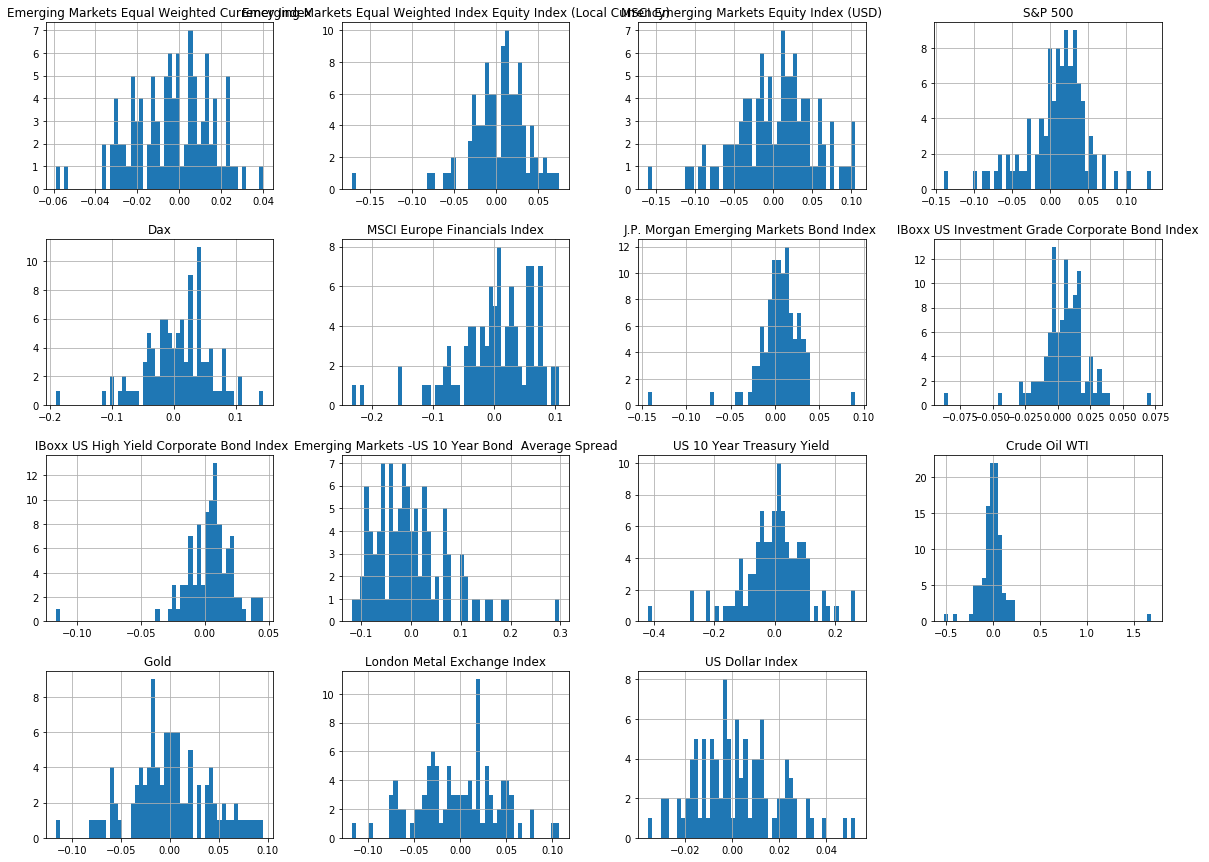

In [10]:
df_M.hist(bins=50, figsize=(20,15))
plt.show()
# # box and whisker plots 
# df_M.plot(kind = 'box', subplots = True, layout = (5,3) , sharex = False, sharey = False,figsize = (20,15) )
# plt.show()

### 7. Describe Numerical Attributes:
Use the DataFrame’s `describe()` method to get a summary of the numerical attributes.

In [11]:
df.describe()
# Get Column Statistics
df['Emerging Markets Equal Weighted Currency Index'].describe()

count    528.000000
mean      -0.000663
std        0.007624
min       -0.034096
25%       -0.004893
50%       -0.000658
75%        0.003924
max        0.026893
Name: Emerging Markets Equal Weighted Currency Index, dtype: float64

###  8. Rename a column 

In [12]:
df = df.rename(columns={'Emerging Markets Equal Weighted Currency Index': 'EM EWC Index'})
df.head()

,EM EWC Index,Emerging Markets Equal Weighted Index Equity Index (Local Currency),MSCI Emerging Markets Equity Index (USD),S&P 500,Dax,MSCI Europe Financials Index,J.P. Morgan Emerging Markets Bond Index,IBoxx US Investment Grade Corporate Bond Index,IBoxx US High Yield Corporate Bond Index,Emerging Markets -US 10 Year Bond Average Spread,US 10 Year Treasury Yield,Crude Oil WTI,Gold,London Metal Exchange Index,US Dollar Index
Date,,,,,,,,,,,,,,,
2012-01-31,0.004764,0.014407,0.020039,-0.010268,0.005683,-0.002900,0.011429,0.016293,0.005693,0.034960,-0.103442,-0.009198,0.022312,-0.006118,-0.003722
2012-02-06,0.010817,0.022674,0.027515,0.024346,0.047338,0.059235,0.008121,0.002494,0.006715,-0.033936,0.059029,-0.015857,-0.008590,0.013485,-0.002810
2012-02-10,-0.002632,-0.002875,-0.004828,-0.001229,-0.010662,-0.005518,-0.000400,-0.000201,-0.001109,-0.021010,0.043649,0.018105,0.000302,-0.002651,0.000556
2012-02-16,-0.001713,0.006353,0.007154,0.011467,0.008804,0.000274,0.004200,0.000190,-0.000204,0.001379,0.000043,0.036840,0.002075,-0.030754,0.003062
2012-02-23,0.008012,0.007381,0.009854,0.003990,0.008542,0.013573,0.009227,0.000995,0.009734,0.004709,0.006109,0.054042,0.033614,0.022572,-0.006699


### 9. Exploring Numerical Correlations with the Target Column

Given the manageable size of the dataset, we can compute the standard correlation coefficient (Pearson’s r) between each pair of attributes using the DataFrame’s `corr()` method.

In [13]:
# Variable Correlation with final Grade

df.corr()['EM EWC Index'].sort_values(ascending=False) 

# numeric_df = df.select_dtypes(include=['number'])
# numeric_df.corr()['EM EWC Index'].sort_values(ascending=False)

EM EWC Index                                                           1.000000
MSCI Emerging Markets Equity Index (USD)                               0.737791
J.P. Morgan Emerging Markets Bond Index                                0.647951
Emerging Markets Equal Weighted Index Equity Index (Local Currency)    0.635412
MSCI Europe Financials Index                                           0.592658
S&P 500                                                                0.533398
 IBoxx US High Yield Corporate Bond Index                              0.523940
London Metal Exchange Index                                            0.490252
Dax                                                                    0.413940
Gold                                                                   0.355422
 IBoxx US Investment Grade Corporate Bond Index                        0.322723
Crude Oil WTI                                                          0.321231
US 10 Year Treasury Yield               

### 10.Visualizing Numerical Correlations
We can visualize the correlations between numerical attributes using Pandas' `scatter_matrix` function. This function plots each numerical attribute against every other numerical attribute.

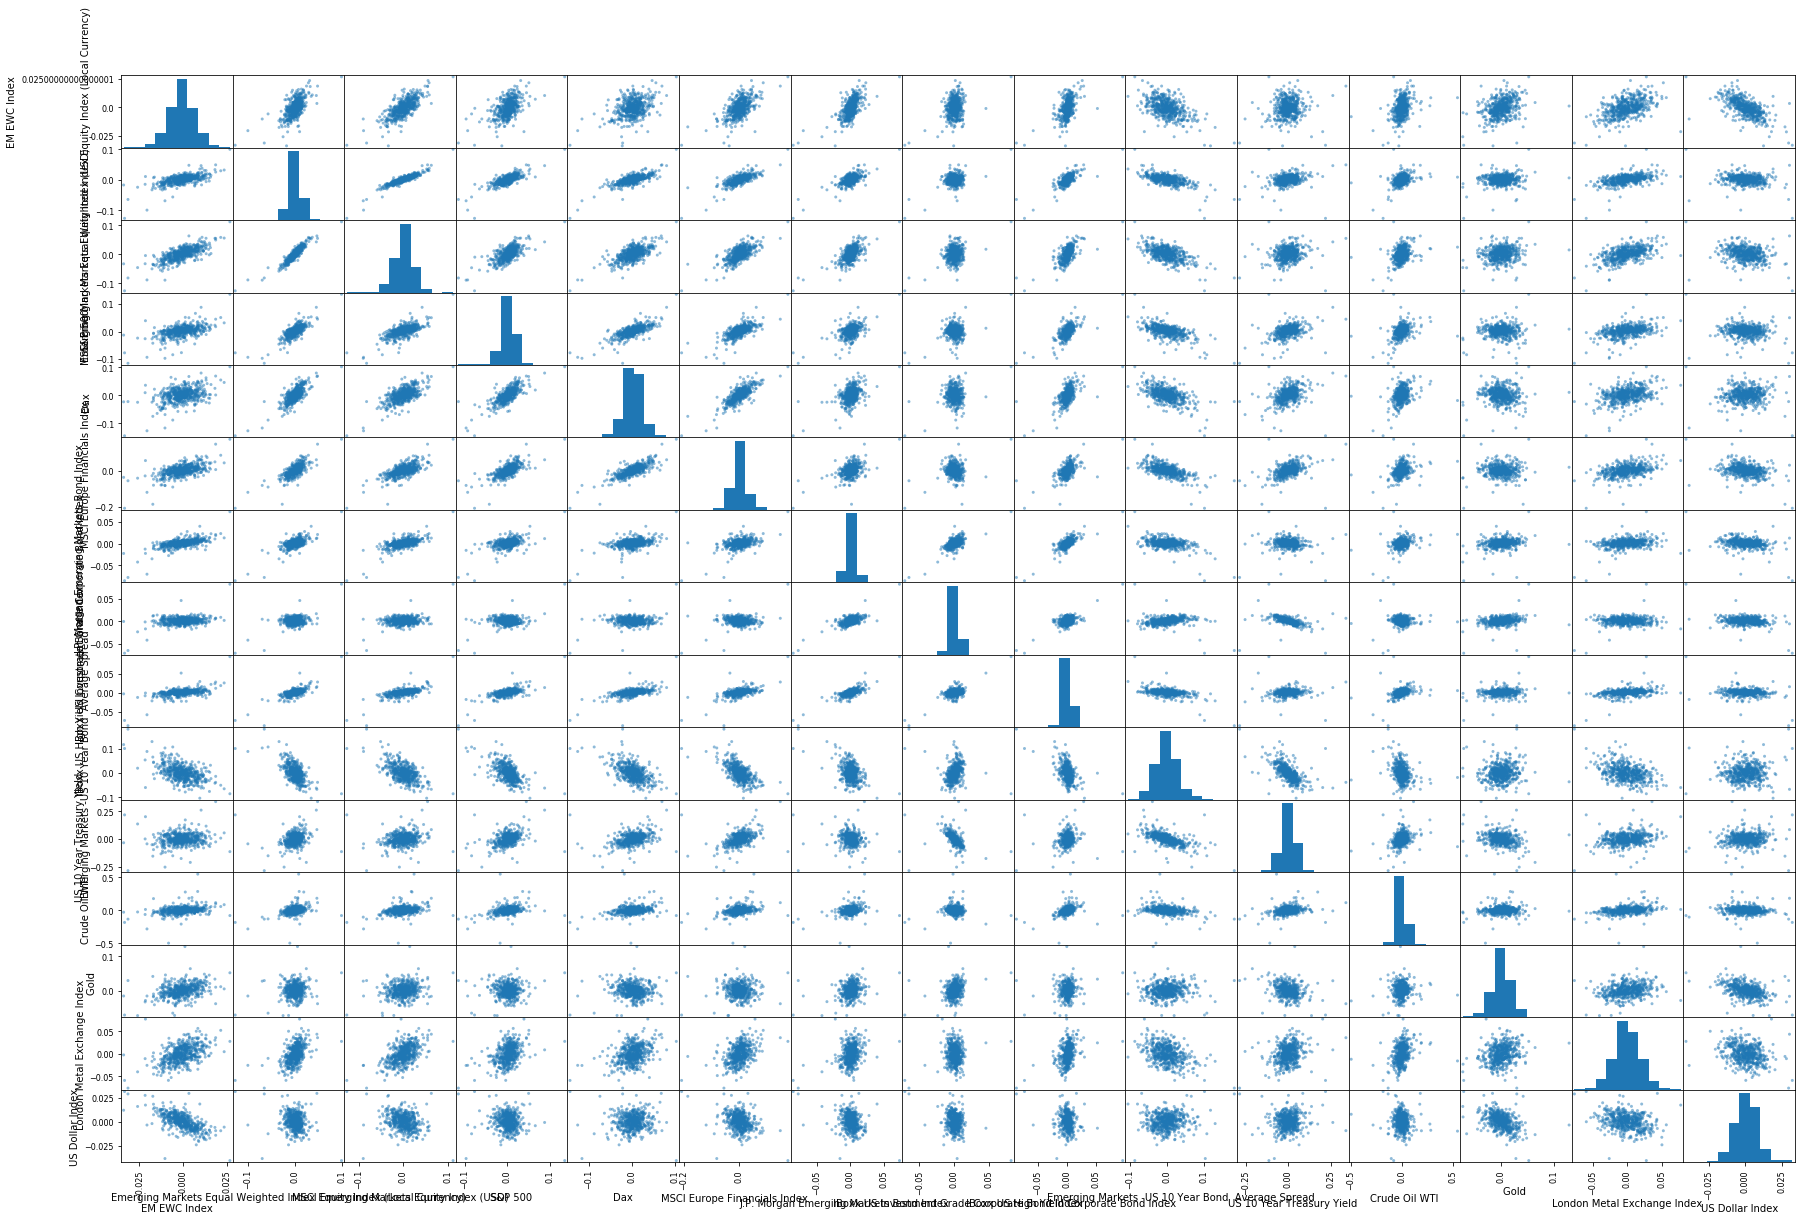

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(30, 20))

# # iloc[] slices based on the index's position, requiring the positional index number.
# scatter_matrix(df.iloc[:,1:5],figsize=(30, 20))

# # slices based on labels, using the names or labels of the index.
# scatter_matrix(df.loc[:,["EM EWC Index","MSCI Emerging Markets Equity Index (USD)","J.P. Morgan Emerging Markets Bond Index "]],figsize=(30, 20))

plt.show()



We can also visualize these correlations using scatterplots with the DataFrame's `plot()` method.

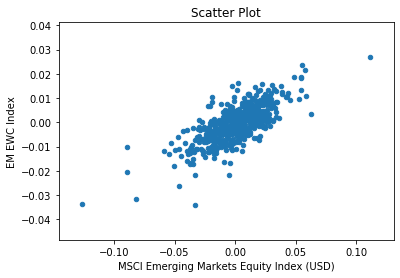

In [15]:
df.plot(title="Scatter Plot", kind="scatter", x="MSCI Emerging Markets Equity Index (USD)", y="EM EWC Index")

Pairs plots are particularly useful for identifying trends for further analysis and can be easily implemented in Python using the `seaborn` package.

Note: Generating a pairs plot can be time-consuming, so please be patient as the plot is created.

In [16]:
# import seaborn as sns
# from scipy import stats

# # Calculate correlation coefficient and annotate the plot
# def corrfunc(x, y, **kws):
#     r, _ = stats.pearsonr(x, y)
#     ax = plt.gca()
#     ax.annotate(f"r = {r:.2f}",
#                 xy=(0.1, 0.6), 
#                 xycoords=ax.transAxes,
#                 size=24)

# # Create a custom colormap using cubehelix (optional)
# cmap = sns.cubehelix_palette(light=1, dark=0.1, 
#                              hue=0.5, as_cmap=True)

# # Set an overall theme/context for the plots
# sns.set_theme(context='talk', style='whitegrid')

# # PairGrid set-up
# g = sns.PairGrid(df_M.iloc[:,0:5])

# # 1. Scatter plot on the upper triangle
# g.map_upper(sns.scatterplot, s=10, color='red')

# # 2. Histogram on the diagonal (replace distplot with histplot)
# g.map_diag(sns.histplot, kde=False, color='red', bins=20)

# # 3. Density plot on the lower triangle
# #    (fill=True will color the KDE area, available in newer Seaborn versions)
# g.map_lower(sns.kdeplot, fill=True, cmap=cmap)

# # 4. Add correlation annotations on the lower triangle
# g.map_lower(corrfunc)

# plt.show()

### 11. Creating a Separate Feature Set (Data Matrix X) and Target Vector (1D Vector y)
To use the effective set of features in machine learning models, it's useful to create a data matrix (X) that contains all the selected features and a 1D target vector (y) that contains the grades.

In [17]:
# It contains all attributes (all features and the target)
allData = df


y = allData['EM EWC Index'] # 1D targer vector

X = allData.drop(labels='EM EWC Index', axis=1) # Data Matrix containing all features excluding the target

allData.head()

,EM EWC Index,Emerging Markets Equal Weighted Index Equity Index (Local Currency),MSCI Emerging Markets Equity Index (USD),S&P 500,Dax,MSCI Europe Financials Index,J.P. Morgan Emerging Markets Bond Index,IBoxx US Investment Grade Corporate Bond Index,IBoxx US High Yield Corporate Bond Index,Emerging Markets -US 10 Year Bond Average Spread,US 10 Year Treasury Yield,Crude Oil WTI,Gold,London Metal Exchange Index,US Dollar Index
Date,,,,,,,,,,,,,,,
2012-01-31,0.004764,0.014407,0.020039,-0.010268,0.005683,-0.002900,0.011429,0.016293,0.005693,0.034960,-0.103442,-0.009198,0.022312,-0.006118,-0.003722
2012-02-06,0.010817,0.022674,0.027515,0.024346,0.047338,0.059235,0.008121,0.002494,0.006715,-0.033936,0.059029,-0.015857,-0.008590,0.013485,-0.002810
2012-02-10,-0.002632,-0.002875,-0.004828,-0.001229,-0.010662,-0.005518,-0.000400,-0.000201,-0.001109,-0.021010,0.043649,0.018105,0.000302,-0.002651,0.000556
2012-02-16,-0.001713,0.006353,0.007154,0.011467,0.008804,0.000274,0.004200,0.000190,-0.000204,0.001379,0.000043,0.036840,0.002075,-0.030754,0.003062
2012-02-23,0.008012,0.007381,0.009854,0.003990,0.008542,0.013573,0.009227,0.000995,0.009734,0.004709,0.006109,0.054042,0.033614,0.022572,-0.006699


### 12. Creating a Separate Test Set
To evaluate the performance of our machine learning model (Linear Regression), we need to set aside a portion of the data (e.g., 20%) for testing. We'll use Scikit-learn's `train_test_split()` function to split the data into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split

# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## B. Linear Regression Using Scikit-learn
Using Scikit-learn's Linear Regression model is straightforward and involves two simple steps:

1. **Create the Model**: Instantiate a Linear Regression object.

2. **Train the Model**: Fit the model to the training data.

After training, you can retrieve the model's intercept and feature weights using the `intercept_` and `coef_` attributes, respectively. To make predictions, use the `predict` method on the test data.



**Performance Measures for Regression Models in Scikit-learn**

To evaluate the performance of the regression model, we can use the following metrics:

- RMSE (Root Mean Squared Error): Use Scikit-learn’s mean_squared_error function to compute the RMSE for the entire dataset. RMSE is useful for understanding the average magnitude of prediction errors.

- R² Score (Coefficient of Determination): Use Scikit-learn’s r2_score function to calculate the R² score, which measures the proportion of variance in the dependent variable that is predictable from the independent variables (features). The best possible R² score is 1.0, indicating perfect prediction, while a score of 0.0 means the model does not predict any variance. It can also be negative, indicating that the model performs worse than a simple mean-based model.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
model = LinearRegression()

# Train the model using the training data and label
model.fit(X_train, y_train)

# Extract the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Display the intercept
print(f'Intercept: {intercept}')

# Display the feature weights (coefficients)
print('Coefficients:', coefficients)

Intercept: -0.0006351670535106629
Coefficients: [-0.17880678  0.20625829  0.03926257  0.01340485 -0.01373311  0.29094227
 -0.09781745 -0.10313049 -0.03762936 -0.00114256  0.00463644  0.00941991
  0.01558651 -0.42522577]


In [20]:
# Show the prediction formula with the intercept and feature weight values
print("\nPrediction Formula: ")
print(' y(predicted) = {0} +  x_1 * {1} +  x_2 * {2} + x_3 * {3} + x_4 * {4} + x_5 * {5} + x_6 * {6} + x_7 * {7} + x_8 * {8}+ x_9 * {9} + x_10 * {10}+ x_11 * {11}+ x_12 * {12} + x_13 * {13}+ x_14 * {14}'
      .format(intercept, coefficients[0], coefficients[1], coefficients[2], coefficients[3], coefficients[4], coefficients[5],
              coefficients[6], coefficients[7], coefficients[8], coefficients[9], coefficients[10], coefficients[11],
              coefficients[12], coefficients[13]))

# Make predictions using the test data
y_predicted = model.predict(X_test)

# Calculate and display the RMSE
# rmse = mean_squared_error(y_test, y_predicted,squared=False)
rmse = mean_squared_error(y_test, y_predicted)**0.5

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate and display the R² score
r2 = r2_score(y_test, y_predicted)
print(f'Coefficient of Determination (R² Score): {r2:.2f}')


Prediction Formula: 
 y(predicted) = -0.0006351670535106629 +  x_1 * -0.17880677735114878 +  x_2 * 0.206258287758198 + x_3 * 0.03926256981581593 + x_4 * 0.013404852836441678 + x_5 * -0.013733114496965446 + x_6 * 0.2909422734262004 + x_7 * -0.09781745440475761 + x_8 * -0.10313048917272505+ x_9 * -0.037629356121899396 + x_10 * -0.0011425606606512546+ x_11 * 0.004636444967285107+ x_12 * 0.009419914405733374 + x_13 * 0.01558650698718408+ x_14 * -0.4252257678661876

Root Mean Squared Error (RMSE): 0.0033
Coefficient of Determination (R² Score): 0.79


## C. Apply Other Models for Regression

In [21]:
# Function to calculate MAE and RMSE
def evaluate_predictions(predictions, actual):
    mae = np.mean(np.abs(predictions - actual)) # Mean Absolute Error
    rmse = np.sqrt(np.mean((predictions - actual) ** 2))
    
    return mae, rmse

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics (Scikit-learn provides built-in functions for calculating MAE and RMSE)
# from sklearn.metrics import mean_squared_error, mean_absolute_error


# Evaluate multiple ML models by training on the training set and testing on the test set
def evaluate_models(X_train, X_test, y_train, y_test):
    # List of model names
    model_names = ['Linear Regression', 'ElasticNet Regression',
                   'Random Forest', 'Extra Trees', 'SVM', 'Gradient Boosted']

    # Instantiate the models
    models = [
        LinearRegression(),
        ElasticNet(alpha=1.0, l1_ratio=0.5),
        RandomForestRegressor(n_estimators=50),
        ExtraTreesRegressor(n_estimators=50),
        SVR(kernel='rbf', C=1.0, gamma='auto'),
        GradientBoostingRegressor(n_estimators=20)
    ]

    # DataFrame to store the results (MAE and RMSE)
    results = pd.DataFrame(columns=['mae', 'rmse'], index=model_names)

    # Train and predict with each model
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate MAE and RMSE

        mae, rmse =  evaluate_predictions(predictions,y_test)
      
        # Store results
        model_name = model_names[i]
        results.loc[model_name,:] = [mae, rmse]


    return results

# Evaluate the models and output the results
results = evaluate_models(X_train, X_test, y_train, y_test)

### Compare Models

                            mae      rmse
Linear Regression      0.002504   0.00328
ElasticNet Regression  0.005591  0.007153
Random Forest          0.002756  0.003621
Extra Trees            0.002595  0.003383
SVM                    0.006279  0.007951
Gradient Boosted       0.002897   0.00397


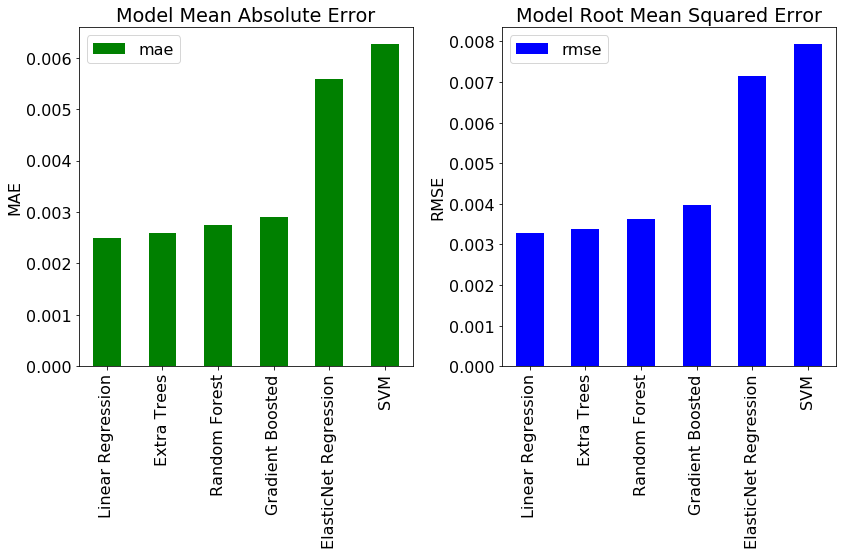

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.pylabtools import figsize

# Set figure size and font size
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16

# Plot Mean Absolute Error (MAE)
ax = plt.subplot(1, 2, 1)
results.sort_values('mae', ascending=True).plot.bar(y='mae', color='g', ax=ax)
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')

# Plot Root Mean Squared Error (RMSE)
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending=True).plot.bar(y='rmse', color='b', ax=ax)
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')

# Adjust layout for better spacing
plt.tight_layout()

# Display results
print(results)